<a href="https://colab.research.google.com/github/Light-Yagami14/ML_Project/blob/main/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras import Model

In [12]:
def conv_bn(x,filters,kernel_size,strides=1,padding = 'same'):
  x = Conv2D(
      filters = filters,
      kernel_size = kernel_size,
      strides = strides,
      padding  = padding,
      use_bias = False
  )(x)
  x = BatchNormalization()(x)
 
  return x

In [19]:
def sep_bn(x,filters,kernel_size,strides=1,padding='same'):
  x = SeparableConv2D(
      filters = filters,
      kernel_size = kernel_size,
      strides = strides,
      padding = padding
  )(x)
  x = BatchNormalization()(x)

  return x

In [13]:
def entry_flow(x):
  x = conv_bn(x, filters =32, kernel_size =3, strides=2)
  x = ReLU()(x)
  x = conv_bn(x, filters =64, kernel_size =3, strides=1)
  tensor = ReLU()(x)
    
  x = sep_bn(tensor, filters = 128, kernel_size =3)
  x = ReLU()(x)
  x = sep_bn(x, filters = 128, kernel_size =3)
  x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
  tensor = conv_bn(tensor, filters=128, kernel_size = 1,strides=2)
  x = Add()([tensor,x])
    
  x = ReLU()(x)
  x = sep_bn(x, filters =256, kernel_size=3)
  x = ReLU()(x)
  x = sep_bn(x, filters =256, kernel_size=3)
  x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
  tensor = conv_bn(tensor, filters=256, kernel_size = 1,strides=2)
  x = Add()([tensor,x])
    
  x = ReLU()(x)
  x = sep_bn(x, filters =728, kernel_size=3)
  x = ReLU()(x)
  x = sep_bn(x, filters =728, kernel_size=3)
  x = MaxPool2D(pool_size=3, strides=2, padding= 'same')(x)

  tensor = conv_bn(tensor, filters=728, kernel_size=1, strides=2)
  x = Add()([tensor,x])

  return x

In [14]:
def middle_flow(tensor):  
  x = ReLU()(tensor)
  x = sep_bn(x, filters = 728, kernel_size = 3)
  x = ReLU()(x)
  x = sep_bn(x, filters = 728, kernel_size = 3)
  x = ReLU()(x)
  x = sep_bn(x, filters = 728, kernel_size = 3)
  x = ReLU()(x)
  tensor = Add()([tensor,x])
        
  return tensor

In [15]:
def exit_flow(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, filters = 728,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 1024,  kernel_size=3)
    x = MaxPool2D(pool_size = 3, strides = 2, padding ='same')(x)
    
    tensor = conv_bn(tensor, filters =1024, kernel_size=1, strides =2)
    x = Add()([tensor,x])
    
    x = sep_bn(x, filters = 1536,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 2048,  kernel_size=3)
    x = GlobalAvgPool2D()(x)
    
    x = Dense (units = 1000, activation = 'softmax')(x)
    
    return x

In [20]:
input = Input(shape = (200,200,3))
x = entry_flow(input)
for i in range(8):
  x = middle_flow(x)
output = exit_flow(x)

model = Model (inputs=input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 100, 100, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 100, 100, 32) 128         conv2d_4[0][0]                   
__________________________________________________________________________________________________
re_lu_4 (ReLU)                  (None, 100, 100, 32) 0           batch_normalization_4[0][0]      
______________________________________________________________________________________________

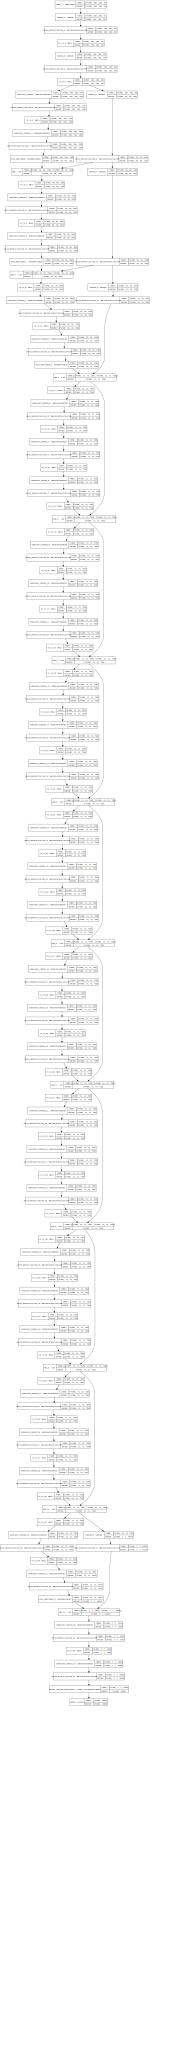

In [21]:
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB',expand_nested=False, dpi=60, subgraph=False).create(prog='dot',format='svg'))

In [22]:
import numpy as np 
import tensorflow.keras.backend as K 
np.sum([K.count_params(p) for p in model.trainable_weights])

22880984